In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Callbacks lets you have control over the training process
# - Overide functions on_epoch_begin , on_epoch_end
# - on_(train|test|predict)_(begin|batch_begin|batch_end)
# - Model method that can take callbacks fit|evaluate|predict|fit_generator|evaluate_generator|predict_generator


# Built in callbacks
# TensorBoard
# ModelCheckpoint
# EarlyStopping
# CSVLogger

In [3]:
# Download and prepare the horses or humans dataset
import tensorflow_datasets as tfds
splits, info = tfds.load('horses_or_humans', as_supervised=True, with_info=True, split=['train[:80%]', 'train[80%:]', 'test'])

(train_examples, validation_examples, test_examples) = splits

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

In [4]:
SIZE = 150 #@param {type:"slider", min:64, max:300, step:1}
IMAGE_SIZE = (SIZE, SIZE)

In [5]:
def format_image(image, label):
  image = tf.image.resize(image, IMAGE_SIZE) / 255.0
  return  image, label

In [6]:
BATCH_SIZE = 32 #@param {type:"integer"}

In [7]:
train_batches = train_examples.shuffle(num_examples // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_examples.map(format_image).batch(1)

for image_batch, label_batch in train_batches.take(1):
  pass

image_batch.shape

TensorShape([32, 150, 150, 3])

In [8]:
def build_model(dense_units, input_shape=IMAGE_SIZE + (3,)):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(dense_units, activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
  ])
  return model

# Tensorboard

In [12]:
%cd callback_logs
%rmdir "logs"

import os
import datetime
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

model.fit(train_batches, 
          epochs=10, 
          validation_data=validation_batches, 
          callbacks=[tensorboard_callback])

D:\Amit\MyWorkspace\DL_adv_techniques_splzn\Course1\callback_logs


The system cannot find the file specified.


Epoch 1/10
26/26 [==============================] - 16s 609ms/step - loss: 0.6772 - accuracy: 0.5779 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
26/26 [==============================] - 13s 487ms/step - loss: 0.6435 - accuracy: 0.6983 - val_loss: 0.6552 - val_accuracy: 0.5220
Epoch 3/10
26/26 [==============================] - 12s 460ms/step - loss: 0.5941 - accuracy: 0.6861 - val_loss: 0.5923 - val_accuracy: 0.6195
Epoch 4/10
26/26 [==============================] - 12s 470ms/step - loss: 0.5756 - accuracy: 0.7032 - val_loss: 0.5871 - val_accuracy: 0.6634
Epoch 5/10
26/26 [==============================] - 13s 495ms/step - loss: 0.5020 - accuracy: 0.7798 - val_loss: 0.4718 - val_accuracy: 0.7707
Epoch 6/10
26/26 [==============================] - 12s 476ms/step - loss: 0.4572 - accuracy: 0.7895 - val_loss: 0.4175 - val_accuracy: 0.8439
Epoch 7/10
26/26 [==============================] - 12s 477ms/step - loss: 0.3826 - accuracy: 0.8637 - val_loss: 0.3981 - val_accuracy

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 17928), started 0:00:59 ago. (Use '!kill 17928' to kill it.)

# ModelCheckpoint

In [29]:
tf.keras.callbacks.ModelCheckpoint?

In [23]:
callback_logs_dir = 'D:\Amit\MyWorkspace\DL_adv_techniques_splzn\Course1\callback_logs'

In [24]:
%cd callback_logs_dir
%rmdir Checkpoint
%mkdir Checkpoint
%cd Checkpoint
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  
model.fit(train_batches, 
          epochs=5, 
          validation_data=validation_batches, 
          verbose=2,
          callbacks=[tf.keras.callbacks.ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5',
                                                        monitor='val_loss',
                                                        mode='auto',
                                                        save_best_only=False,
                                                        save_weights_only=False,
                                                        save_freq='epoch',
                                                        #**kwargs
                                                        verbose=1),
          ])

[WinError 2] The system cannot find the file specified: 'callback_logs_dir'
D:\Amit\MyWorkspace\DL_adv_techniques_splzn\Course1\callback_logs\Checkpoint


The system cannot find the file specified.


D:\Amit\MyWorkspace\DL_adv_techniques_splzn\Course1\callback_logs\Checkpoint\Checkpoint
Epoch 1/5

Epoch 00001: saving model to weights.01-0.67-0.52.h5
26/26 - 13s - loss: 0.6597 - accuracy: 0.5949 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5

Epoch 00002: saving model to weights.02-0.57-0.75.h5
26/26 - 12s - loss: 0.6014 - accuracy: 0.7214 - val_loss: 0.5742 - val_accuracy: 0.7512
Epoch 3/5

Epoch 00003: saving model to weights.03-0.47-0.80.h5
26/26 - 12s - loss: 0.5238 - accuracy: 0.7786 - val_loss: 0.4663 - val_accuracy: 0.8049
Epoch 4/5

Epoch 00004: saving model to weights.04-0.47-0.79.h5
26/26 - 12s - loss: 0.4394 - accuracy: 0.8248 - val_loss: 0.4665 - val_accuracy: 0.7902
Epoch 5/5

Epoch 00005: saving model to weights.05-0.38-0.86.h5
26/26 - 12s - loss: 0.3987 - accuracy: 0.8394 - val_loss: 0.3835 - val_accuracy: 0.8634


In [26]:
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  
model.fit(train_batches, 
          epochs=1, 
          validation_data=validation_batches, 
          verbose=2,
          callbacks=[tf.keras.callbacks.ModelCheckpoint('saved_model', verbose=1)
          ])


Epoch 00001: saving model to saved_model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


26/26 - 15s - loss: 0.6648 - accuracy: 0.5779 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [28]:
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  
model.fit(train_batches, 
          epochs=2, 
          validation_data=validation_batches, 
          verbose=2,
          callbacks=[tf.keras.callbacks.ModelCheckpoint('model.h5', verbose=1)
          ])

Epoch 1/2

Epoch 00001: saving model to model.h5
26/26 - 14s - loss: 0.6679 - accuracy: 0.5888 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2

Epoch 00002: saving model to model.h5
26/26 - 14s - loss: 0.6418 - accuracy: 0.6691 - val_loss: 0.5993 - val_accuracy: 0.8146


# EarlyStopping

In [32]:
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  
model.fit(train_batches, 
          epochs=2, 
          validation_data=validation_batches, 
          verbose=2,
          callbacks=[tf.keras.callbacks.EarlyStopping(
              patience=3,
              min_delta=0.05,
              baseline=0.8,
              mode='min',
              monitor='val_loss',
              restore_best_weights=True,
              verbose=1)
          ])

Epoch 1/2
26/26 - 13s - loss: 0.6853 - accuracy: 0.5949 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
26/26 - 12s - loss: 0.6101 - accuracy: 0.7178 - val_loss: 0.5737 - val_accuracy: 0.7805


# CSVLogger

In [34]:
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  
csv_file = 'training.csv'

model.fit(train_batches, 
          epochs=5, 
          validation_data=validation_batches, 
          callbacks=[tf.keras.callbacks.CSVLogger(csv_file)
          ])

Epoch 1/5
26/26 [==============================] - 13s 510ms/step - loss: 0.6557 - accuracy: 0.6265 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
26/26 [==============================] - 12s 463ms/step - loss: 0.6036 - accuracy: 0.6971 - val_loss: 0.5910 - val_accuracy: 0.6390
Epoch 3/5
26/26 [==============================] - 12s 466ms/step - loss: 0.5580 - accuracy: 0.7518 - val_loss: 0.5144 - val_accuracy: 0.8098
Epoch 4/5
26/26 [==============================] - 12s 473ms/step - loss: 0.4767 - accuracy: 0.7920 - val_loss: 0.4343 - val_accuracy: 0.7854
Epoch 5/5
26/26 [==============================] - 13s 483ms/step - loss: 0.4417 - accuracy: 0.8114 - val_loss: 0.3789 - val_accuracy: 0.8098


In [35]:
pd.read_csv(csv_file).head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.626521,0.655713,0.741463,0.614726
1,1,0.697080,0.600497,0.639024,0.591020
2,2,0.751825,0.543783,0.809756,0.514424
3,3,0.791971,0.479527,0.785366,0.434304
4,4,0.811435,0.436586,0.809756,0.378902


# LearningRateScheduler

In [38]:
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

import math
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 1
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

model.fit(train_batches, 
          epochs=5, 
          validation_data=validation_batches, 
          callbacks=[tf.keras.callbacks.LearningRateScheduler(step_decay, verbose=1),
                    tf.keras.callbacks.TensorBoard(log_dir='log_dir')])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.005.
Epoch 1/5
26/26 [==============================] - 14s 519ms/step - loss: 0.6829 - accuracy: 0.5560 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0025.
Epoch 2/5
26/26 [==============================] - 12s 459ms/step - loss: 0.6677 - accuracy: 0.5608 - val_loss: 0.6845 - val_accuracy: 0.4732

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00125.
Epoch 3/5
26/26 [==============================] - 13s 489ms/step - loss: 0.6614 - accuracy: 0.5730 - val_loss: 0.6780 - val_accuracy: 0.5122

Epoch 00004: LearningRateScheduler reducing learning rate to 0.000625.
Epoch 4/5
26/26 [==============================] - 13s 484ms/step - loss: 0.6580 - accuracy: 0.5925 - val_loss: 0.6765 - val_accuracy: 0.5122

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0003125.
Epoch 5/5
26/26 [==============================] - 13s 493ms/step - l

In [40]:
%tensorboard --logdir log_dir

Reusing TensorBoard on port 6006 (pid 9996), started 0:01:26 ago. (Use '!kill 9996' to kill it.)

# ReduceLROnPlateau

In [41]:
model = build_model(dense_units=256)
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])
  
model.fit(train_batches, 
          epochs=50, 
          validation_data=validation_batches, 
          callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                       factor=0.2, verbose=1,
                                       patience=1, min_lr=0.001),
                     tf.keras.callbacks.TensorBoard(log_dir='log_dir')])

Epoch 1/50
26/26 [==============================] - 15s 572ms/step - loss: 0.6691 - accuracy: 0.5961 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6141 - accuracy: 0.6927
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
26/26 [==============================] - 16s 627ms/step - loss: 0.6016 - accuracy: 0.7445 - val_loss: 0.7916 - val_accuracy: 0.4488
Epoch 3/50
26/26 [==============================] - 18s 683ms/step - loss: 0.5653 - accuracy: 0.7798 - val_loss: 0.5531 - val_accuracy: 0.8195
Epoch 4/50
26/26 [==============================] - 16s 622ms/step - loss: 0.5234 - accuracy: 0.8345 - val_loss: 0.5457 - val_accuracy: 0.7951
Epoch 5/50
26/26 [==============================] - 17s 635ms/step - loss: 0.5058 - accuracy: 0.8333 - val_loss: 0.5124 - val_accuracy: 0.8341
Epoch 6/50
6/7 [========================>.....] - ETA: 0s - loss: 0.4983 - accuracy: 0.8542
Epoch 00006: ReduceLROnP

Epoch 44/50
26/26 [==============================] - 12s 450ms/step - loss: 0.2076 - accuracy: 0.9416 - val_loss: 0.1976 - val_accuracy: 0.9561
Epoch 45/50
6/7 [========================>.....] - ETA: 0s - loss: 0.2012 - accuracy: 0.9583
Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.001.
26/26 [==============================] - 12s 455ms/step - loss: 0.2036 - accuracy: 0.9453 - val_loss: 0.2023 - val_accuracy: 0.9317
Epoch 46/50
6/7 [========================>.....] - ETA: 0s - loss: 0.1975 - accuracy: 0.9583
Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.001.
26/26 [==============================] - 12s 457ms/step - loss: 0.2014 - accuracy: 0.9416 - val_loss: 0.2002 - val_accuracy: 0.9317
Epoch 47/50
6/7 [========================>.....] - ETA: 0s - loss: 0.2081 - accuracy: 0.9479
Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.001.
26/26 [==============================] - 12s 452ms/step - loss: 0.1969 - accuracy: 0.9526 - val_loss: 0.2109 - val_accura

In [42]:
%tensorboard --logdir log_dir

Reusing TensorBoard on port 6006 (pid 9996), started 0:13:28 ago. (Use '!kill 9996' to kill it.)

# Custom Callbacks

In [43]:
%reset -f

In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

In [59]:
# Define the Keras model to add callbacks to
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(1, activation = 'linear', input_dim = 784))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.1), loss='mean_squared_error', metrics=['mae'])
    return model

In [60]:
# Load example MNIST data and pre-process it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

### Simple custom call back

In [61]:
import datetime
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self,batch,logs):
        print("Training: batch {} begins at {}".format(batch,datetime.datetime.now().time()))
        
        
    def on_train_batch_end(self,batch,logs):
        print("Training: batch {} ends at {}".format(batch,datetime.datetime.now().time()))
        print(logs)
        

In [62]:
model = get_model()
history = model.fit(x_train, y_train,
          batch_size=64,
          epochs=2,
          steps_per_epoch=5,
          verbose=1,
          callbacks=[MyCustomCallback()]
                   )

Train on 60000 samples
Epoch 1/2
Training: batch 0 begins at 01:28:31.594923
Training: batch 0 ends at 01:28:31.874482
{'batch': 0, 'size': 64, 'loss': 27.98352, 'mae': 4.3970833}
   64/60000 [..............................] - ETA: 4:24 - loss: 27.9835 - mae: 4.3971Training: batch 1 begins at 01:28:31.874482
Training: batch 1 ends at 01:28:31.874482
{'batch': 1, 'size': 64, 'loss': 871.6771, 'mae': 16.068436}
Training: batch 2 begins at 01:28:31.874482
Training: batch 2 ends at 01:28:31.874482
{'batch': 2, 'size': 64, 'loss': 22.412762, 'mae': 12.065216}
Training: batch 3 begins at 01:28:31.874482
Training: batch 3 ends at 01:28:31.874482
{'batch': 3, 'size': 64, 'loss': 9.232285, 'mae': 9.6634}
Training: batch 4 begins at 01:28:31.874482
Training: batch 4 ends at 01:28:31.883990
{'batch': 4, 'size': 64, 'loss': 9.1420765, 'mae': 8.2394495}
Epoch 2/2
Training: batch 0 begins at 01:28:31.883990
Training: batch 0 ends at 01:28:31.883990
{'batch': 0, 'size': 64, 'loss': 7.413978, 'mae': 2

In [66]:
#Overiding different functions gives different metrics in the logs
callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch,logs: 
#     print(logs)
    print(logs,"\n","Epoch: {}, Val/Train loss ratio: {:.2f}".format(epoch, logs["val_loss"] / logs["loss"]))
)

model = get_model()
history = model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=64,
          epochs=3,
          verbose=0,
          callbacks=[callback])

{'loss': 33.19569485727946, 'mae': 4.7836285, 'val_loss': 44.539475134277346, 'val_mae': 5.9969077} 
 Epoch: 0, Val/Train loss ratio: 1.34
{'loss': 32.19951679051717, 'mae': 4.712431, 'val_loss': 9.62701717224121, 'val_mae': 2.5371711} 
 Epoch: 1, Val/Train loss ratio: 0.30
{'loss': 32.25576402460734, 'mae': 4.7842245, 'val_loss': 45.4684759765625, 'val_mae': 6.181657} 
 Epoch: 2, Val/Train loss ratio: 1.41


### Detect overfitting callback

In [69]:
class DetectOverfittingCallback(tf.keras.callbacks.Callback):
    def __init__(self,threshold=0.7):
        self.threshold = threshold
        
    def on_epoch_end(self,epoch,logs=None):
        ratio = logs["val_loss"] / logs["loss"]
        print("Epoch: {}, Val/Train loss ratio: {:.2f}".format(epoch, ratio))
        
        if ratio > self.threshold:
            print("Stopping training...")
            self.model.stop_training = True
            
model = get_model()
history = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              batch_size=64,
              epochs=10,
              verbose=1,
              callbacks=[DetectOverfittingCallback()])
        
        

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
57600/60000 [===========================>..] - ETA: 0s - loss: 33.2970 - mae: 4.7595Epoch: 0, Val/Train loss ratio: 2.10
Stopping training...
60000/60000 [==============================] - 2s 30us/sample - loss: 33.1912 - mae: 4.7431 - val_loss: 69.5712 - val_mae: 7.6809


### Custom callback to visualize prediction

In [70]:
# Load example MNIST data and pre-process it
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [79]:
# !pip install imageio

You should consider upgrading via the 'd:\amit\myworkspace\dl_adv_techniques_splzn\pvenv\scripts\python.exe -m pip install --upgrade pip' command.


In [96]:
import imageio
import io
from PIL import Image
from IPython.display import Image as IPyImage
# Visualization utilities
plt.rc('font', size=20)
plt.rc('figure', figsize=(15, 3))

def display_digits(inputs, outputs, ground_truth, epoch, n=10):
    plt.clf()

    plt.yticks([])
    plt.grid(None)
    inputs = np.reshape(inputs, [n, 28, 28])
    inputs = np.swapaxes(inputs, 0, 1)
    inputs = np.reshape(inputs, [28, 28*n])
    plt.imshow(inputs)
    plt.xticks([28*x+14 for x in range(n)], outputs)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]: 
            t.set_color('green') 
        else: 
            t.set_color('red')
    plt.grid(None)

In [97]:
GIF_PATH = 'animation.gif'

In [98]:
class VisCallback(tf.keras.callbacks.Callback):
    def __init__(self, inputs, ground_truth, display_freq=10, n_samples=10):
        self.inputs = inputs
        self.ground_truth = ground_truth
        self.images = []
        self.display_freq = display_freq
        self.n_samples = n_samples

    def on_epoch_end(self, epoch, logs=None):
        # Randomly sample data
        indexes = np.random.choice(len(self.inputs), size=self.n_samples)
        X_test, y_test = self.inputs[indexes], self.ground_truth[indexes]
        predictions = np.argmax(self.model.predict(X_test), axis=1)

        # Plot the digits
        display_digits(X_test, predictions, y_test, epoch, n=self.display_freq)

        # Save the figure
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        image = Image.open(buf)
        self.images.append(np.array(image))

        # Display the digits every 'display_freq' number of epochs
        if epoch % self.display_freq == 0:
            plt.show()

    def on_train_end(self, logs=None):
        imageio.mimsave(GIF_PATH, self.images, fps=1)

In [99]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='linear', input_dim=784))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

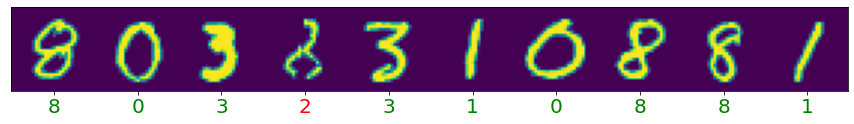

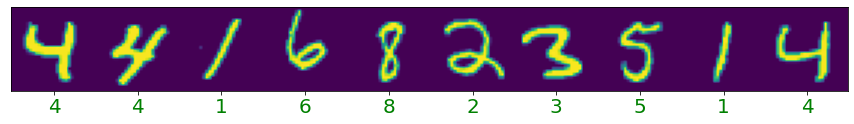

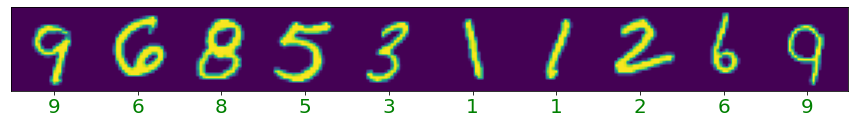

In [100]:
model = get_model()
model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          verbose=0,
          callbacks=[VisCallback(x_test, y_test)])

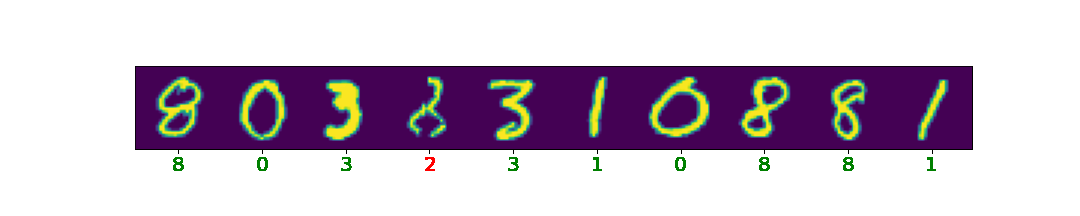

In [101]:
SCALE = 60

# FYI, the format is set to PNG here to bypass checks for acceptable embeddings
IPyImage(GIF_PATH, format='png', width=15 * SCALE, height=3 * SCALE) 